In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import matplotlib.pyplot as plt
from skpsl.preprocessing import MinEntropyBinarizer

sns.set(font_scale=1,rc={'text.usetex' : True})
sns.set_style("white")
plt.rc('font', **{'family': 'serif'})
plt.rcParams["figure.figsize"] = (9, 3.5)

In [5]:
df = pd.read_csv("data/player_raw.csv", sep=";")
targetcols = ['Forward','Midfielder','Defender','Goalkeeper']
abs_cols = ["Mins", "Goals", "Assists", "Yel", "Red"]
row_sum = df[targetcols].sum(axis=1)
df = df[row_sum == 1]
df.insert(0,'target', df[targetcols].idxmax(axis=1))
df = df.drop(columns=["Name", "Full Name", "Nationality", "Current Team"]+targetcols + abs_cols)
df = df.dropna()
df = df.rename(columns={"Pass Success Percentage": "Pass Success Rate", "Mins/App":"Minutes/Match", "Goals/App":"Goals/Match", "Assists/App":"Assists/Match", "Yel/App":"Yellow Cards/Match", "Red/App":"Red Cards/Match", "Apps":"Matches", "Shots per Game":"Shots/Match"})
df

,target,Age,Height,Shirt Number,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won
1,Defender,25.0,192.0,5.0,224,86.986607,0.049107,0.062500,0.187500,0.008929,0.5,85.3,2.2
5,Forward,27.0,189.0,11.0,67,69.343284,0.552239,0.134328,0.059701,0.000000,2.0,73.6,1.1
6,Midfielder,21.0,182.0,18.0,68,62.735294,0.191176,0.044118,0.073529,0.000000,1.7,83.8,0.3
7,Goalkeeper,25.0,189.0,99.0,58,89.017241,0.000000,0.000000,0.086207,0.000000,0.0,74.3,0.3
8,Midfielder,25.0,180.0,56.0,173,55.774566,0.075145,0.080925,0.144509,0.017341,0.9,82.4,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,Midfielder,34.0,185.0,16.0,254,67.082677,0.086614,0.125984,0.185039,0.015748,1.1,85.9,1.2
5445,Defender,22.0,188.0,4.0,8,54.875000,0.000000,0.000000,0.000000,0.000000,0.4,76.7,2.4
5446,Defender,33.0,193.0,2.0,233,88.618026,0.038627,0.025751,0.098712,0.008584,0.4,71.1,3.4
5447,Defender,29.0,190.0,5.0,23,82.521739,0.043478,0.000000,0.130435,0.000000,0.8,77.5,2.7


In [6]:
df.to_csv("data/player_processed.csv", index=False)

In [7]:
def add_patch(ax, cell_x, cell_y):
    # Get the edges of the cell
    x_left = cell_x
    x_right = cell_x + 1
    y_bottom = cell_y
    y_top = cell_y - 1

    # Define the coordinates for the pattern
    vertices = [
        (x_left, (y_top + y_bottom) / 2),  # Start from middle left
        (x_left+(x_right-x_left)*.3 , (y_top + y_bottom) / 2),  # Go to the center
        ((x_right+x_left)/2 , y_bottom-(y_bottom-y_top) *.3),  # Go to the center
        ((x_left + x_right) / 2, y_bottom),  # Go down to the middle of the bottom
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO,Path.LINETO]

    # Create the Path and add the patch
    path = Path(vertices, codes)
    patch = PathPatch(path, edgecolor='black', lw=1, zorder=10,fill=False)
    ax.add_patch(patch)

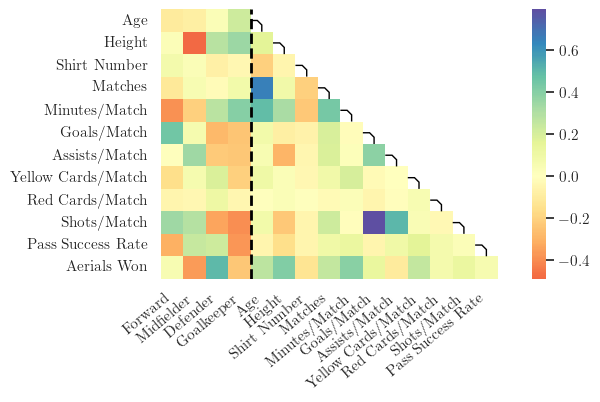

In [8]:
df2 = df.copy()
target = df2.pop("target")
for cl in reversed(targetcols):
    df2.insert(0,cl, target==cl)

corr = df2.corr().iloc[4:,:-1]
mask = np.triu(np.ones_like(corr, dtype=bool), k=4)
ax = sns.heatmap(corr,mask=mask, cmap="Spectral", center=0, square=True)
for i in range(11):
    add_patch(ax, 4+i, 1+i)  # Transform (row, col) to heatmap coordinates
ax.axvline(4, color="black", linestyle="--", lw=2)
plt.xticks(rotation=40,ha="right") # cmap="vlag"
plt.savefig("Corr Player Dataset.pdf", bbox_inches="tight")

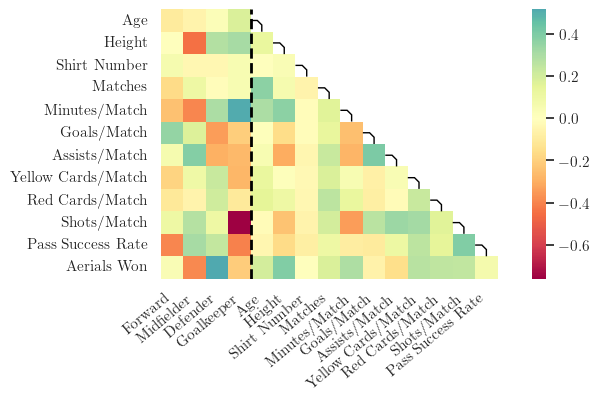

In [9]:
df2 = df.copy()
target = df2.pop("target")

df2[:] = MinEntropyBinarizer().fit_transform(df2.values, target)


for cl in reversed(targetcols):
    df2.insert(0,cl, target==cl)

corr = df2.corr().iloc[4:,:-1]
mask = np.triu(np.ones_like(corr, dtype=bool), k=4)
ax = sns.heatmap(corr,mask=mask, cmap="Spectral", center=0, square=True)
for i in range(11):
    add_patch(ax, 4+i, 1+i)  # Transform (row, col) to heatmap coordinates
ax.axvline(4, color="black", linestyle="--", lw=2)
plt.xticks(rotation=40,ha="right") # cmap="vlag"
None

plt.savefig("Corr Player Dataset.pdf", bbox_inches="tight")